# NEW HOTS 02 - Testing HOTS on the N-MNIST dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import time
import os
import pickle
from mix_Network import *

## 1. Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [3]:
hots = network(krnlinit='first', tau=1)
loader = hots.learning1by1()

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [00:33<00:00,  2.27s/it]


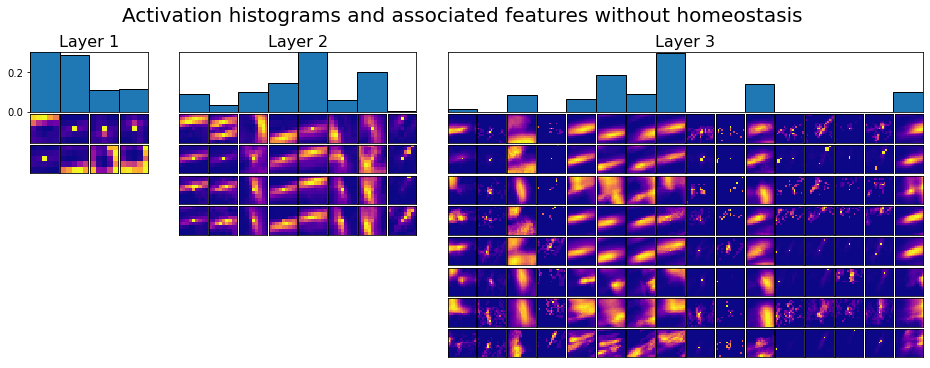

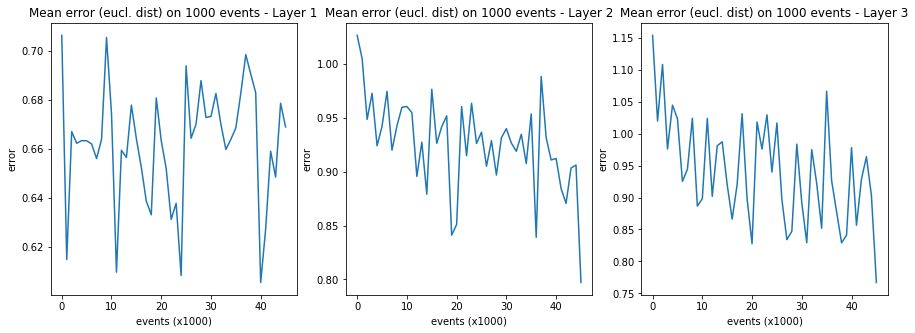

In [4]:
hots.plotlayer()
hots.plotconv()

In [5]:
trainmap, loader, _  = hots.training(loader)
testmap, loader, _  = hots.testing(loader, trainmap)

100%|██████████| 40/40 [01:32<00:00,  2.32s/it]


bhatta:62.5% - eucli:45.0% - norm:45.0%


## 1.2 Random initialisation of the kernels

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [00:41<00:00,  2.74s/it]


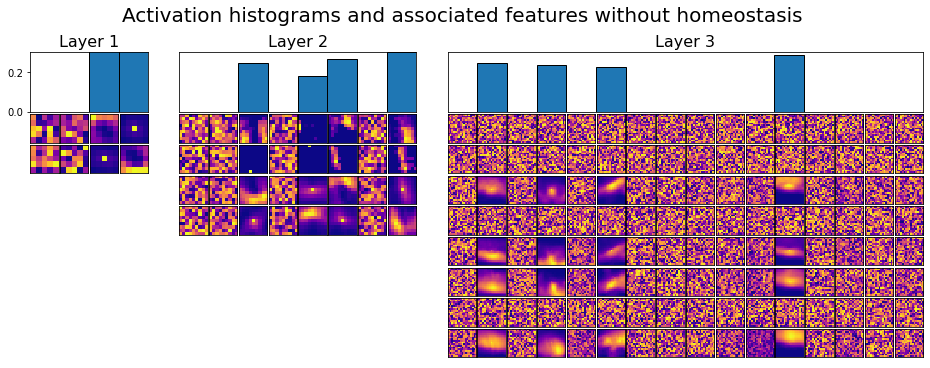

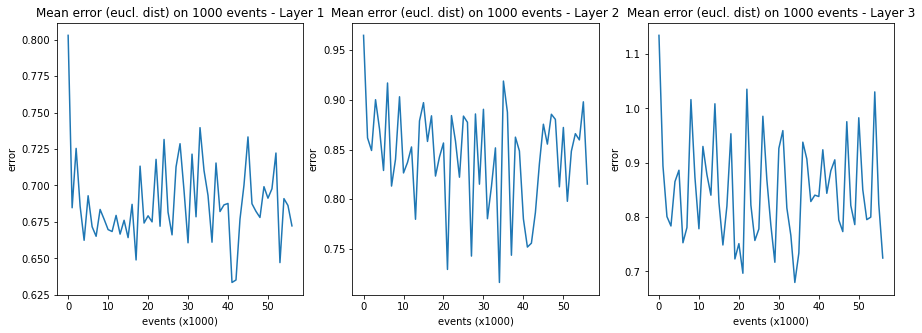

In [6]:
hots = network(krnlinit='rdn', tau=1)
loader = hots.learning1by1()
hots.plotlayer()
hots.plotconv()

In [7]:
trainmap, loader, _  = hots.training(loader)
testmap, loader, _  = hots.testing(loader, trainmap)

100%|██████████| 40/40 [01:21<00:00,  2.04s/it]


bhatta:30.0% - eucli:32.5% - norm:32.5%


## 1.3 Adding Homeostasis

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [00:47<00:00,  3.13s/it]


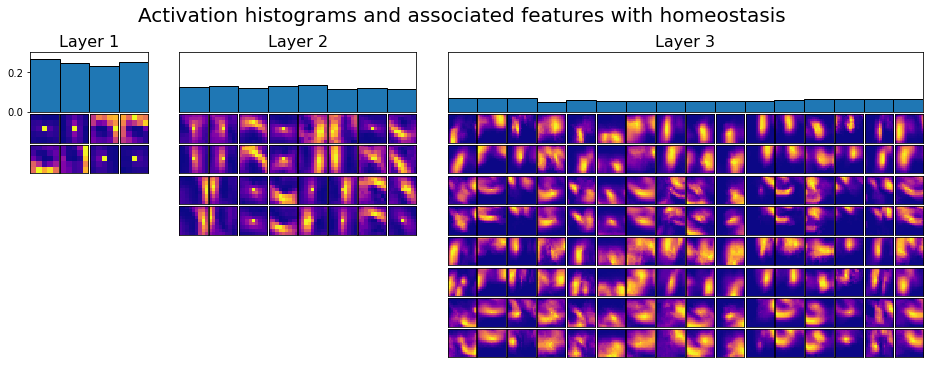

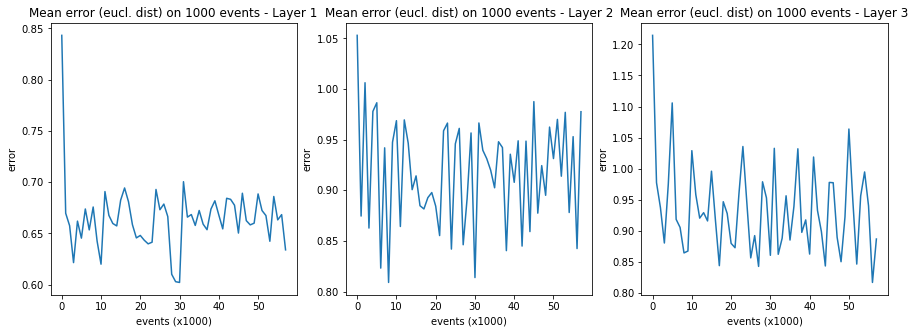

In [8]:
homhots = network(krnlinit='rdn', tau=1, homeo=True)
loaderhom = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [9]:
trainmaphom, loaderhom, _  = homhots.training(loaderhom)
testmaphom, loaderhom, _ = homhots.testing(loaderhom, trainmaphom)

100%|██████████| 40/40 [01:49<00:00,  2.73s/it]


bhatta:62.5% - eucli:52.5% - norm:55.00000000000001%


### 1.3.1 Classification without homeostasis

In [10]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom2, loaderhom, _  = homhots.training(loaderhom)
testmaphom2, loaderhom, _  = homhots.testing(loaderhom, trainmaphom2)

100%|██████████| 40/40 [01:26<00:00,  2.16s/it]


bhatta:62.5% - eucli:47.5% - norm:47.5%


### 1.4 Homeostasis and intialisation with the first TS

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [00:44<00:00,  2.94s/it]


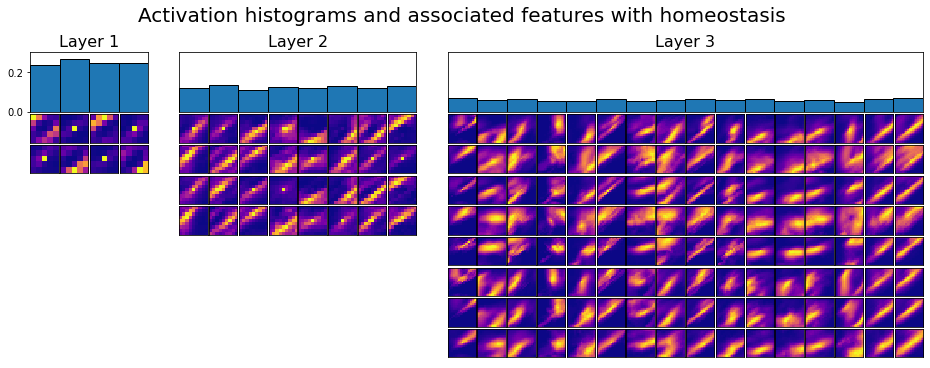

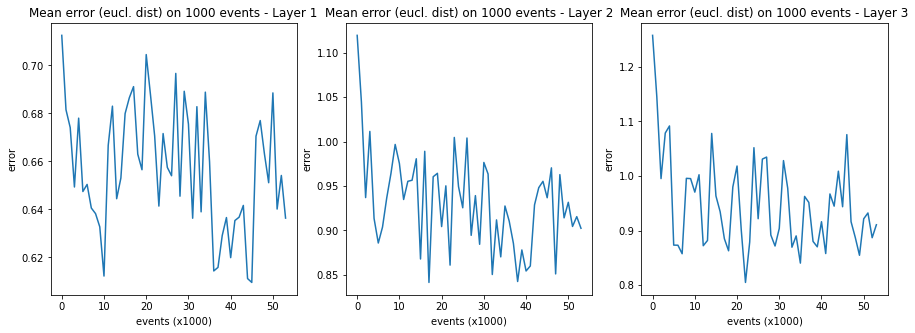

In [11]:
homhots = network(krnlinit='first', tau=1, homeo=True)
loaderhom = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [12]:
trainmaphom, loaderhom, _  = homhots.training(loaderhom)
testmaphom, loaderhom, _  = homhots.testing(loaderhom, trainmaphom)

100%|██████████| 40/40 [01:47<00:00,  2.68s/it]


bhatta:70.0% - eucli:67.5% - norm:67.5%


In [13]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom, loader, _  = homhots.training(loader)
testmaphom, loader, _  = homhots.testing(loader, trainmaphom)

100%|██████████| 40/40 [01:39<00:00,  2.48s/it]


bhatta:65.0% - eucli:62.5% - norm:67.5%
